In [430]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [431]:
D_train=pd.read_excel('Doctor_train.xlsx')

In [432]:
D_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [433]:
D_train.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [434]:
D_test=pd.read_excel('Doctor_test.xlsx')

In [435]:
D_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [436]:
D_test.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


In [437]:
D_train.shape , D_test.shape

((5961, 7), (1987, 6))

Observation :
    
    We can see we have 5961 rows and 7 columns in the train dataset
    
    We can see we have 1987 rows and 6 columns in test dataset

In [438]:
D_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

We can see all columns are object except fees column

In [439]:
D_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

We can see all columns in test dataset is object

In [440]:
D_train.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [441]:
D_test.nunique()

Qualification          630
Experience              57
Rating                  36
Place                  592
Profile                  6
Miscellaneous_Info    1084
dtype: int64

In [442]:
D_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


We can see there is a null values present in Rating, Miscellaneous_info column and place columns

In [443]:
D_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


We can see there is a null values present in Rating,Miscellaneous_info column and place columns

In [444]:
D_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We can see number of null values in dataset

In [445]:
D_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

We can see number of null values in dataset

In [446]:
D_train['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

Observation:
    
    MBBS,BDS,BAMS,MD,BHMS,Fellowship,DLO,MLO,DNB,DDVL,MS  , these qualifications are present in a very high number. 
So, we are going to add features of those and add values '1' or '0' as if they are present or not.

In [447]:
# train
def qualification(qual,value):
  for data in dat:
    if data.find(value) !=-1:
      qual.append(int(1))
    else :
      qual.append(int(0))
def to_df(lst):
  lst=pd.DataFrame(lst)
  return lst

column=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']

In [448]:
dat=D_train['Qualification']

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mlo=[]
dnb=[]
ddvl=[]
ms=[]

qualification(mbbs,'MBBS')
qualification(bds,'BDS')
qualification(bams,'BAMS')
qualification(md,'MD')
qualification(bhms,'BHMS')
qualification(fellowship,'Fellowship')
qualification(dlo,'DLO')
qualification(mlo,'MLO')
qualification(dnb,'DNB')
qualification(ddvl,'DDVL')
qualification(ms,'MS')

mbbs=to_df(mbbs)
bds=to_df(bds)
bams=to_df(bams)
md=to_df(md)
bhms=to_df(bhms)
fellowship=to_df(fellowship)
dlo=to_df(dlo)
mlo=to_df(mlo)
dnb=to_df(dnb)
ddvl=to_df(ddvl)
ms=to_df(ms)

D_train.drop('Qualification',axis=1,inplace=True)
D_train=pd.concat([mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,D_train],axis=1)

mx=D_train.columns[11:]
for i in mx:
  column.append(i)
D_train.columns=column
D_train.head()


,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,1,0,0,0,0,0,0,1,1,0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,0,0,1,0,0,0,0,0,1,1,0,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1,0,0,0,0,0,0,0,0,1,0,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,0,0,1,0,0,0,0,0,0,1,0,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,0,0,1,0,0,0,0,0,0,1,0,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [449]:
#test
dat=D_test['Qualification']

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mlo=[]
dnb=[]
ddvl=[]
ms=[]

qualification(mbbs,'MBBS')
qualification(bds,'BDS')
qualification(bams,'BAMS')
qualification(md,'MD')
qualification(bhms,'BHMS')
qualification(fellowship,'Fellowship')
qualification(dlo,'DLO')
qualification(mlo,'MLO')
qualification(dnb,'DNB')
qualification(ddvl,'DDVL')
qualification(ms,'MS')

mbbs=to_df(mbbs)
bds=to_df(bds)
bams=to_df(bams)
md=to_df(md)
bhms=to_df(bhms)
fellowship=to_df(fellowship)
dlo=to_df(dlo)
mlo=to_df(mlo)
dnb=to_df(dnb)
ddvl=to_df(ddvl)
ms=to_df(ms)

D_test.drop('Qualification',axis=1,inplace=True)
D_test=pd.concat([mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,D_test],axis=1)

column=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']

mx=D_test.columns[11:]
for i in mx:
  column.append(i)

D_test.columns=column
D_test.head()


,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info
0,1,0,0,0,0,0,0,0,0,0,0,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,1,0,0,0,1,0,0,0,0,0,0,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,1,0,0,1,0,0,0,0,0,0,0,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,0,0,1,0,0,0,0,0,0,1,0,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,0,0,0,0,0,0,0,1,1,0,0,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Miscellaneous column

As the column holds special infomation and blank spaces also, we are going to treat all the non-null as '1' and others as '0'.

In [450]:
# Train
for i in D_train['Miscellaneous_Info'].value_counts().index:
  D_train['Miscellaneous_Info'].replace(i,int(1),inplace=True)
D_train['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [451]:
D_train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,1,0,0,0,0,0,0,1,1,0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,1.0,100
1,0,0,1,0,0,0,0,0,1,1,0,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,1.0,350
2,1,0,0,0,0,0,0,0,0,1,0,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,0.0,300
3,0,0,1,0,0,0,0,0,0,1,0,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,1.0,250
4,0,0,1,0,0,0,0,0,0,1,0,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,1.0,250


In [452]:
# Test

for i in D_test['Miscellaneous_Info'].value_counts().index:
  D_test['Miscellaneous_Info'].replace(i,int(1),inplace=True)
D_test['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [453]:
D_test.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info
0,1,0,0,0,0,0,0,0,0,0,0,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,0.0
1,1,0,0,0,1,0,0,0,0,0,0,31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,0.0
2,1,0,0,1,0,0,0,0,0,0,0,40 years experience,70%,"KK Nagar, Chennai",Dermatologists,1.0
3,0,0,1,0,0,0,0,0,0,1,0,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,0.0
4,0,0,0,0,0,0,0,1,1,0,0,16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,1.0


Experince

In [454]:
# Train

for i in D_train['Experience'].value_counts().index:
  data=i.split()
  D_train['Experience'].replace(i,int(data[0]),inplace=True)
    
# Test

for i in D_test['Experience'].value_counts().index:
  data=i.split()
  D_test['Experience'].replace(i,int(data[0]),inplace=True)

In [455]:
D_train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,1,0,0,0,0,0,0,1,1,0,24,100%,"Kakkanad, Ernakulam",Homeopath,1.0,100
1,0,0,1,0,0,0,0,0,1,1,0,12,98%,"Whitefield, Bangalore",Ayurveda,1.0,350
2,1,0,0,0,0,0,0,0,0,1,0,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,0.0,300
3,0,0,1,0,0,0,0,0,0,1,0,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,1.0,250
4,0,0,1,0,0,0,0,0,0,1,0,20,100%,"Keelkattalai, Chennai",Ayurveda,1.0,250


In [456]:
D_test.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info
0,1,0,0,0,0,0,0,0,0,0,0,35,NaN,"Ghatkopar East, Mumbai",General Medicine,0.0
1,1,0,0,0,1,0,0,0,0,0,0,31,NaN,"West Marredpally, Hyderabad",ENT Specialist,0.0
2,1,0,0,1,0,0,0,0,0,0,0,40,70%,"KK Nagar, Chennai",Dermatologists,1.0
3,0,0,1,0,0,0,0,0,0,1,0,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,0.0
4,0,0,0,0,0,0,0,1,1,0,0,16,100%,"Kanakpura Road, Bangalore",Dentist,1.0


Rating

In [457]:
D_train['Rating'].fillna('-999%',inplace=True)
D_test['Rating'].fillna('-999%',inplace=True)

# We have to remove % symbol
# Train

for i in D_train['Rating'].value_counts().index:
  D_train['Rating'].replace(i,int(i[:-1]),inplace=True)

# Test

for i in D_test['Rating'].value_counts().index:
  D_test['Rating'].replace(i,int(i[:-1]),inplace=True)

In [458]:
D_train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,0,1,0,0,0,0,0,0,1,1,0,24,100,"Kakkanad, Ernakulam",Homeopath,1.0,100
1,0,0,1,0,0,0,0,0,1,1,0,12,98,"Whitefield, Bangalore",Ayurveda,1.0,350
2,1,0,0,0,0,0,0,0,0,1,0,9,-999,"Mathikere - BEL, Bangalore",ENT Specialist,0.0,300
3,0,0,1,0,0,0,0,0,0,1,0,12,-999,"Bannerghatta Road, Bangalore",Ayurveda,1.0,250
4,0,0,1,0,0,0,0,0,0,1,0,20,100,"Keelkattalai, Chennai",Ayurveda,1.0,250


In [459]:
D_test.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Place,Profile,Miscellaneous_Info
0,1,0,0,0,0,0,0,0,0,0,0,35,-999,"Ghatkopar East, Mumbai",General Medicine,0.0
1,1,0,0,0,1,0,0,0,0,0,0,31,-999,"West Marredpally, Hyderabad",ENT Specialist,0.0
2,1,0,0,1,0,0,0,0,0,0,0,40,70,"KK Nagar, Chennai",Dermatologists,1.0
3,0,0,1,0,0,0,0,0,0,1,0,0,-999,"New Ashok Nagar, Delhi",Ayurveda,0.0
4,0,0,0,0,0,0,0,1,1,0,0,16,100,"Kanakpura Road, Bangalore",Dentist,1.0


Place

We will split the area and the city into two different features as they can give us hints about the fees.

At first we are going to fill the null values with (None,None)

In [460]:
D_train['Place'].fillna('None,None',inplace=True)
D_test['Place'].fillna('None,None',inplace=True)

Now we are going separate the comma separated two types-city and area.

In [461]:
D_train['Area']=D_train['Place'].str.rsplit(',',1).str.get(0)
D_train['City']=D_train['Place'].str.rsplit(',',1).str.get(1)
D_test['Area']=D_test['Place'].str.rsplit(',',1).str.get(0)
D_test['City']=D_test['Place'].str.split(',',1).str.get(1)

D_train['City']=D_train['City'].str.strip()
D_test['City']=D_test['City'].str.strip()

D_train.drop('Place',axis=1,inplace=True)
D_test.drop('Place',axis=1,inplace=True)

In [462]:
D_train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100,Homeopath,1.0,100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98,Ayurveda,1.0,350,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,-999,ENT Specialist,0.0,300,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,-999,Ayurveda,1.0,250,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100,Ayurveda,1.0,250,Keelkattalai,Chennai


In [463]:
D_test.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,1,0,0,0,0,0,0,0,0,0,0,35,-999,General Medicine,0.0,Ghatkopar East,Mumbai
1,1,0,0,0,1,0,0,0,0,0,0,31,-999,ENT Specialist,0.0,West Marredpally,Hyderabad
2,1,0,0,1,0,0,0,0,0,0,0,40,70,Dermatologists,1.0,KK Nagar,Chennai
3,0,0,1,0,0,0,0,0,0,1,0,0,-999,Ayurveda,0.0,New Ashok Nagar,Delhi
4,0,0,0,0,0,0,0,1,1,0,0,16,100,Dentist,1.0,Kanakpura Road,Bangalore


In [464]:
D_train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [465]:
D_train['Area'].value_counts()

HSR Layout       75
Andheri West     70
Dwarka           67
Banjara Hills    64
Mulund West      54
                 ..
TV Chalai         1
Urapakkam         1
Hegde Nagar       1
Kalapatti         1
Kallambalam       1
Name: Area, Length: 868, dtype: int64

# Exploratory data analysis

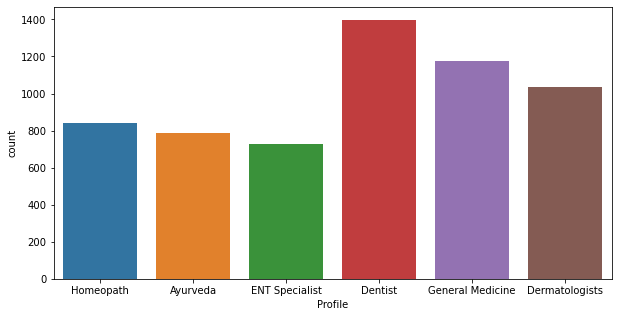

In [466]:
plt.figure(figsize=(10,5))
sns.countplot('Profile',data=D_train)

Observation:
    
    We can see dentist profiles are high compare to all profiles

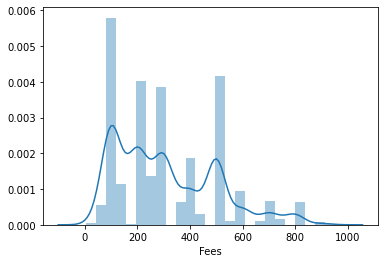

In [467]:
sns.distplot(D_train['Fees'])

Observation:
    
    We can see fee distribution of doctors, highest frequency of fee is 100

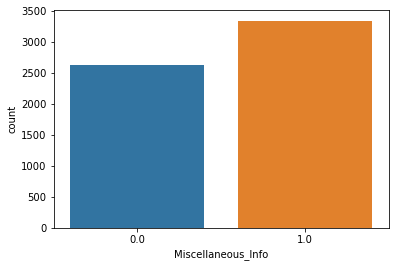

In [468]:
sns.countplot(D_train['Miscellaneous_Info'])

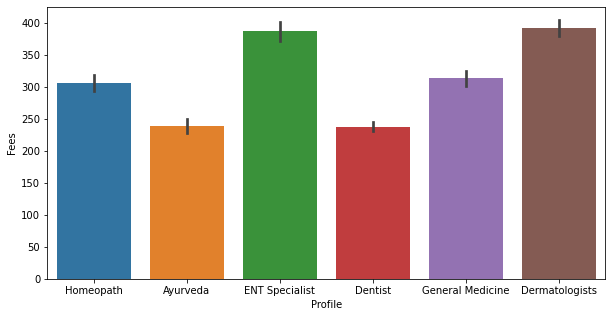

In [469]:
plt.figure(figsize=(10,5))
sns.barplot(x='Profile',y='Fees',data=D_train)

Observation:  
    
    We can see ENT specialists and Dermotologists are taking highest fees 

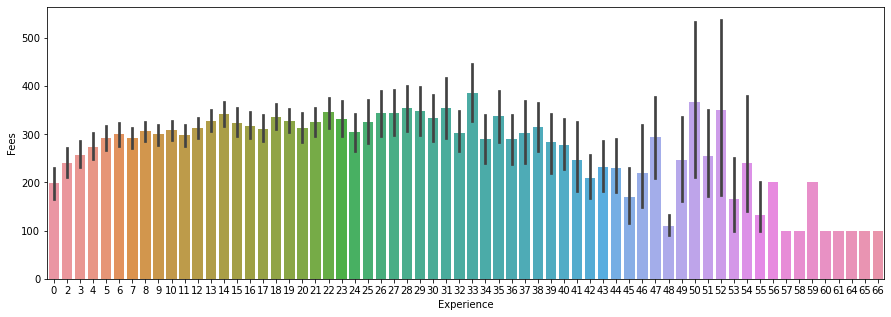

In [470]:
plt.figure(figsize=(15,5))
sns.barplot(x='Experience',y='Fees',data=D_train)

Observation:
    
    We can see relationship between experinence and fees of the doctors, We can see whose doctors having experience 10 to 35 years are taking highest fees

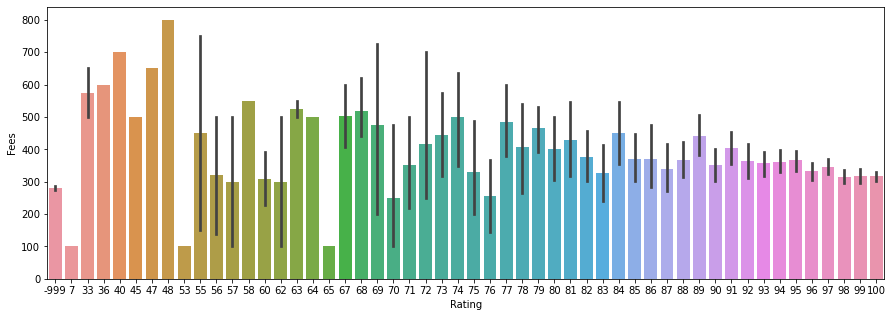

In [471]:
plt.figure(figsize=(15,5))
sns.barplot(x='Rating',y='Fees',data=D_train)

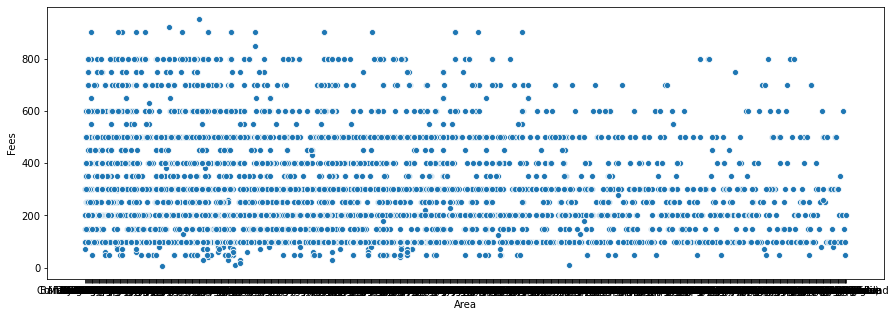

In [472]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Area',y='Fees',data=D_train)

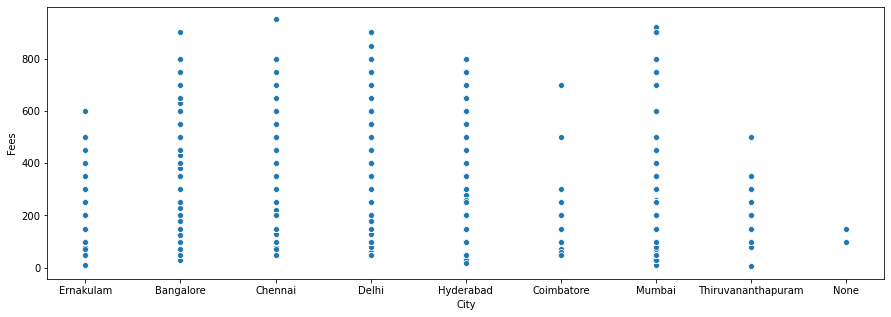

In [473]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='City',y='Fees',data=D_train) 

We can see doctor fee of diffrent cities

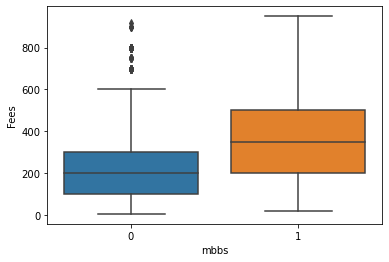

In [474]:
sns.boxplot(x='mbbs',y='Fees',data=D_train)

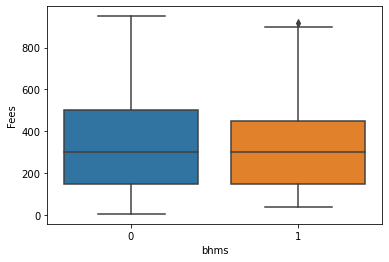

In [475]:
sns.boxplot(x='bhms',y='Fees',data=D_train)

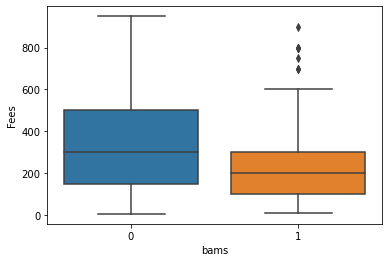

In [476]:
sns.boxplot(x='bams',y='Fees',data=D_train)

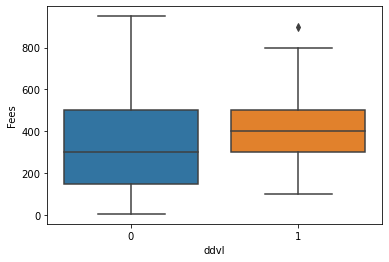

In [477]:
sns.boxplot(x='ddvl',y='Fees',data=D_train)

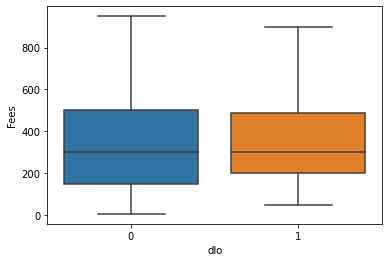

In [478]:
sns.boxplot(x='dlo',y='Fees',data=D_train)

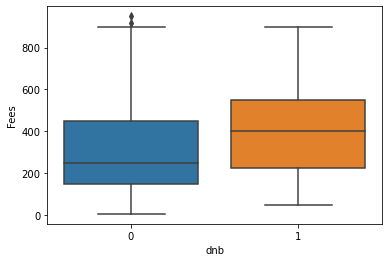

In [479]:
sns.boxplot(x='dnb',y='Fees',data=D_train)

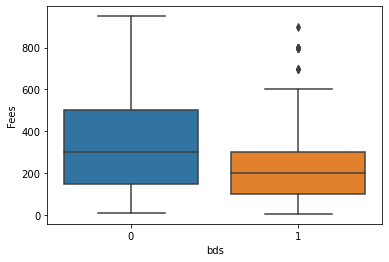

In [480]:
sns.boxplot(x='bds',y='Fees',data=D_train)

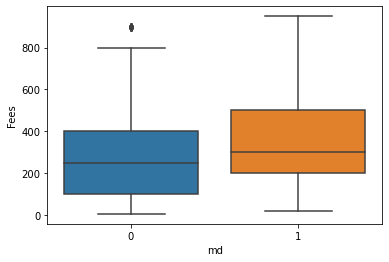

In [481]:
sns.boxplot(x='md',y='Fees',data=D_train)

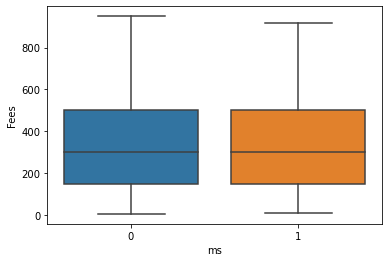

In [482]:
sns.boxplot(x='ms',y='Fees',data=D_train)

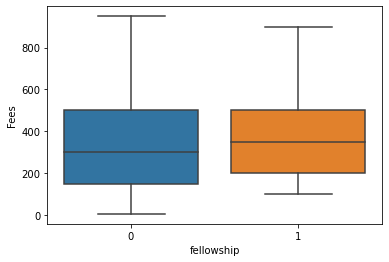

In [483]:
sns.boxplot(x='fellowship',y='Fees',data=D_train)

# Pre processing

In [484]:
D_train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100,Homeopath,1.0,100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98,Ayurveda,1.0,350,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,-999,ENT Specialist,0.0,300,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,-999,Ayurveda,1.0,250,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100,Ayurveda,1.0,250,Keelkattalai,Chennai


I want to encode the categorical features

In [485]:
from sklearn.preprocessing import LabelEncoder

In [486]:
le=LabelEncoder()

In [487]:
# Train
D_train['Profile']=le.fit_transform(D_train['Profile'])
D_train['Area']=le.fit_transform(D_train['Area'])

# Test

D_test['Profile']=le.fit_transform(D_test['Profile'])
D_test['Area']=le.fit_transform(D_test['Area'])

In [488]:
D_train

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100,5,1.0,100,297,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98,0,1.0,350,857,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,-999,3,0.0,300,453,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,-999,0,1.0,250,68,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100,0,1.0,250,336,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,1,0,19,98,3,1.0,300,70,Bangalore
5957,1,0,0,0,0,0,0,0,0,0,0,33,-999,4,0.0,100,537,Chennai
5958,1,0,0,0,0,0,0,0,0,0,0,41,97,4,1.0,600,216,Delhi
5959,1,0,0,0,0,0,0,0,1,0,0,15,90,4,1.0,100,842,Mumbai


In [489]:
D_test

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,1,0,0,0,0,0,0,0,0,0,0,35,-999,4,0.0,142,Mumbai
1,1,0,0,0,1,0,0,0,0,0,0,31,-999,3,0.0,578,Hyderabad
2,1,0,0,1,0,0,0,0,0,0,0,40,70,2,1.0,212,Chennai
3,0,0,1,0,0,0,0,0,0,1,0,0,-999,0,0.0,373,Delhi
4,0,0,0,0,0,0,0,1,1,0,0,16,100,1,1.0,231,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,0,0,1,0,0,0,0,0,0,1,0,10,-999,0,0.0,58,Bangalore
1983,1,0,0,0,0,0,0,0,1,0,0,4,-999,2,0.0,96,Chennai
1984,1,0,0,0,0,0,0,0,1,1,0,9,-999,4,0.0,424,Chennai
1985,0,0,0,0,0,0,0,1,0,0,0,12,98,1,1.0,26,Bangalore


We have to encode City manually

In [490]:
train_city=D_train['City'].value_counts().index
test_city=D_test['City'].value_counts().index
train_city=to_df(train_city)
test_city=to_df(test_city)

In [491]:
city_new=pd.concat([train_city,test_city],axis=0)
city_new.columns=['0']
a1=x3['0'].value_counts().index
i=0
for val in a1:
  D_train['City'].replace(val,int(i),inplace=True)
  D_test['City'].replace(val,int(i),inplace=True)
  i+=1


In [492]:
D_train

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100,5,1.0,100,297,2.0
1,0,0,1,0,0,0,0,0,1,1,0,12,98,0,1.0,350,857,8.0
2,1,0,0,0,0,0,0,0,0,1,0,9,-999,3,0.0,300,453,8.0
3,0,0,1,0,0,0,0,0,0,1,0,12,-999,0,1.0,250,68,8.0
4,0,0,1,0,0,0,0,0,0,1,0,20,100,0,1.0,250,336,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,1,0,19,98,3,1.0,300,70,8.0
5957,1,0,0,0,0,0,0,0,0,0,0,33,-999,4,0.0,100,537,5.0
5958,1,0,0,0,0,0,0,0,0,0,0,41,97,4,1.0,600,216,6.0
5959,1,0,0,0,0,0,0,0,1,0,0,15,90,4,1.0,100,842,7.0


In [493]:
D_test

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,1,0,0,0,0,0,0,0,0,0,0,35,-999,4,0.0,142,7
1,1,0,0,0,1,0,0,0,0,0,0,31,-999,3,0.0,578,3
2,1,0,0,1,0,0,0,0,0,0,0,40,70,2,1.0,212,5
3,0,0,1,0,0,0,0,0,0,1,0,0,-999,0,0.0,373,6
4,0,0,0,0,0,0,0,1,1,0,0,16,100,1,1.0,231,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,0,0,1,0,0,0,0,0,0,1,0,10,-999,0,0.0,58,8
1983,1,0,0,0,0,0,0,0,1,0,0,4,-999,2,0.0,96,5
1984,1,0,0,0,0,0,0,0,1,1,0,9,-999,4,0.0,424,5
1985,0,0,0,0,0,0,0,1,0,0,0,12,98,1,1.0,26,8


In [494]:
D_train.isnull().sum()

mbbs                  0
bhms                  0
bams                  0
ddvl                  0
dlo                   0
mlo                   0
dnb                   0
bds                   0
md                    0
ms                    0
fellowship            0
Experience            0
Rating                0
Profile               0
Miscellaneous_Info    0
Fees                  0
Area                  0
City                  1
dtype: int64

In [495]:
D_train.dropna(inplace=True)

In [496]:
D_train.isnull().sum()

mbbs                  0
bhms                  0
bams                  0
ddvl                  0
dlo                   0
mlo                   0
dnb                   0
bds                   0
md                    0
ms                    0
fellowship            0
Experience            0
Rating                0
Profile               0
Miscellaneous_Info    0
Fees                  0
Area                  0
City                  0
dtype: int64

# Model building

In [497]:
# I want to predict Doctor fee  by regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [498]:
x=D_train.drop('Fees',axis=1)
x

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100,5,1.0,297,2.0
1,0,0,1,0,0,0,0,0,1,1,0,12,98,0,1.0,857,8.0
2,1,0,0,0,0,0,0,0,0,1,0,9,-999,3,0.0,453,8.0
3,0,0,1,0,0,0,0,0,0,1,0,12,-999,0,1.0,68,8.0
4,0,0,1,0,0,0,0,0,0,1,0,20,100,0,1.0,336,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1,0,0,0,0,0,0,0,0,1,0,19,98,3,1.0,70,8.0
5957,1,0,0,0,0,0,0,0,0,0,0,33,-999,4,0.0,537,5.0
5958,1,0,0,0,0,0,0,0,0,0,0,41,97,4,1.0,216,6.0
5959,1,0,0,0,0,0,0,0,1,0,0,15,90,4,1.0,842,7.0


In [499]:
y=D_train['Fees']
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5960, dtype: int64

In [500]:
# standardization of data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.94290242,  2.63968075, -0.38287706, ...,  0.8853796 ,
        -0.45167603, -1.9232445 ],
       [-0.94290242, -0.37883369,  2.61180442, ...,  0.8853796 ,
         1.73880933,  1.18061069],
       [ 1.06055513, -0.37883369, -0.38287706, ..., -1.12945905,
         0.1585306 ,  1.18061069],
       ...,
       [ 1.06055513, -0.37883369, -0.38287706, ...,  0.8853796 ,
        -0.7685141 ,  0.14599229],
       [ 1.06055513, -0.37883369, -0.38287706, ...,  0.8853796 ,
         1.68013562,  0.66330149],
       [-0.94290242, -0.37883369, -0.38287706, ...,  0.8853796 ,
         0.72962143,  0.14599229]])

In [556]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [557]:
x_train.shape

(4172, 17)

In [558]:
x_test.shape

(1788, 17)

In [559]:
y_train.shape

(4172,)

In [560]:
y_test.shape

(1788,)

In [561]:
lr=LinearRegression()

In [562]:
lr.fit(x_train,y_train)

LinearRegression()

In [563]:
lr.score(x_train,y_train)

0.1775877839002934

# cross validation

In [564]:
from sklearn.model_selection import cross_val_score
linearscore = cross_val_score(lr,x,y,cv=6)
print(linearscore)
print(linearscore.mean(),linearscore.std())

[0.15941575 0.15817722 0.18336886 0.17581617 0.15999505 0.1585129 ]
0.1658809902148242 0.009955012896234603


Ther is no overfitting and underfitting 

# Check for various methods

In [565]:
# Check for various methods using for loop.
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
import warnings
warnings.filterwarnings('ignore')


model=[SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is : ',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Mean absolute error : ",mean_absolute_error(y_test,predm))
    print("Mean squared error : ",mean_squared_error(y_test,predm))
    print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,predm)))
    print('r2 score :',r2_score(y_test,predm))
    print('\n')      
        

score of SVR() is :  0.1010043406886465
Mean absolute error :  139.40524890548926
Mean squared error :  32224.142633605807
Root mean squared error :  179.51084266307092
r2 score : 0.0992888961789351


score of DecisionTreeRegressor() is :  0.9980066473321786
Mean absolute error :  171.9888143176734
Mean squared error :  59028.649888143176
Root mean squared error :  242.9581237335833
r2 score : -0.6499356089111026


score of KNeighborsRegressor() is :  0.38917143272982047
Mean absolute error :  139.44395973154363
Mean squared error :  33614.54279642058
Root mean squared error :  183.34269223620717
r2 score : 0.06042521314347582


score of Lasso() is :  0.1764709460854491
Mean absolute error :  136.38859386725318
Mean squared error :  30082.982538315442
Root mean squared error :  173.44446528591058
r2 score : 0.15913739842815688


score of Ridge() is :  0.17758770881528652
Mean absolute error :  135.99859826717264
Mean squared error :  30146.8306759668
Root mean squared error :  173.6284

Observation:

     from above all linear models no model is giving better accuracy

# Ensemble

In [566]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

ensemble=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in ensemble:
    m.fit(x_train,y_train)
    print('score of',m,'is : ',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Mean absolute error : ",mean_absolute_error(y_test,predm))
    print("Mean squared error : ",mean_squared_error(y_test,predm))
    print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,predm)))
    print('r2 score :',r2_score(y_test,predm))
    print('\n')      

score of RandomForestRegressor() is :  0.8873984230323264
Mean absolute error :  128.6209459891339
Mean squared error :  28803.876115905674
Root mean squared error :  169.71704721655297
r2 score : 0.19489026145178967


score of AdaBoostRegressor() is :  0.15206243559977173
Mean absolute error :  143.99851220981196
Mean squared error :  31245.009226114697
Root mean squared error :  176.76257869276148
r2 score : 0.12665708227086447


score of GradientBoostingRegressor() is :  0.29521111713444737
Mean absolute error :  129.23656658156108
Mean squared error :  27918.39166614214
Root mean squared error :  167.08797582753266
r2 score : 0.21964082456936784




Observation:
    
    from above all ensemble techniques RandomForestRegressor is giving 88.7% of accuracy

# Saving best model

In [569]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [570]:
rf.score(x_train,y_train)

0.8873422889132069

In [575]:
# saving the model

import joblib
joblib.dump(rf,'doctor_fee_rf.ob')


['doctor_fee_rf.ob']

# Pass the test data into the model

In [571]:
D_test

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,1,0,0,0,0,0,0,0,0,0,0,35,-999,4,0.0,142,7
1,1,0,0,0,1,0,0,0,0,0,0,31,-999,3,0.0,578,3
2,1,0,0,1,0,0,0,0,0,0,0,40,70,2,1.0,212,5
3,0,0,1,0,0,0,0,0,0,1,0,0,-999,0,0.0,373,6
4,0,0,0,0,0,0,0,1,1,0,0,16,100,1,1.0,231,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,0,0,1,0,0,0,0,0,0,1,0,10,-999,0,0.0,58,8
1983,1,0,0,0,0,0,0,0,1,0,0,4,-999,2,0.0,96,5
1984,1,0,0,0,0,0,0,0,1,1,0,9,-999,4,0.0,424,5
1985,0,0,0,0,0,0,0,1,0,0,0,12,98,1,1.0,26,8


In [572]:
test=sc.fit_transform(D_test)

In [573]:
test

array([[ 1.01470294, -0.37763831, -0.37327585, ..., -1.17579505,
        -0.85237621,  0.67121619],
       [ 1.01470294, -0.37763831, -0.37327585, ..., -1.17579505,
         1.66466088, -1.45590753],
       [ 1.01470294, -0.37763831, -0.37327585, ...,  0.85048836,
        -0.44826475, -0.39234567],
       ...,
       [ 1.01470294, -0.37763831, -0.37327585, ..., -1.17579505,
         0.77561566, -0.39234567],
       [-0.9855101 , -0.37763831, -0.37327585, ...,  0.85048836,
        -1.52204663,  1.20299712],
       [ 1.01470294, -0.37763831, -0.37327585, ...,  0.85048836,
         0.60242504, -0.39234567]])

In [577]:
# load the saved mode

model=joblib.load('doctor_fee_rf.ob')

In [578]:
# passing the test data into  model

predictions=model.predict(test)

In [579]:
predictions

array([297.3       , 279.5       , 439.9       , ..., 256.8       ,
       272.83333333, 353.5       ])

# Saving the results into csv file

In [580]:
# Saving predicted values in CSV file
output=pd.DataFrame(predictions)
output.columns=['Predictions']
output.to_csv('Doctor_fee_final_submission.csv')